# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro

# Load Dataset

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

# Clean & Explore

In [5]:
df = df[df['InvoiceNo'].str.startswith('C') == False]  # Remove cancellations
df = df.dropna(subset=['Quantity', 'UnitPrice'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Distribution Check

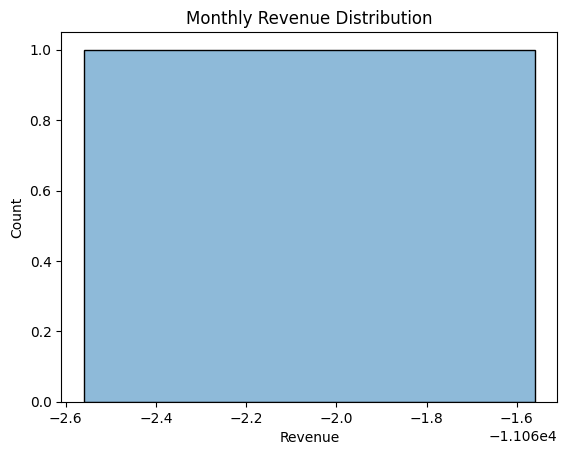

In [6]:
sns.histplot(monthly_revenue, kde=True)
plt.title("Monthly Revenue Distribution")
plt.show()

# Normality Test

In [7]:
stat, p = shapiro(monthly_revenue)
print(f"Shapiro-Wilk p-value: {p:.4f}")  # If p > 0.05, assume normal

Shapiro-Wilk p-value: nan


/tmp/ipython-input-2245125441.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(monthly_revenue)


# Monte Carlo Simulation

In [8]:
mu, sigma = monthly_revenue.mean(), monthly_revenue.std()
simulations = np.random.normal(mu, sigma, 10000)
quarterly_sim = np.sum(np.random.normal(mu, sigma, (10000, 3)), axis=1)

# Analysis

In [9]:
probability = np.mean(quarterly_sim > 100000)
print(f"Probability of exceeding £100K: {probability:.2%}")

Probability of exceeding £100K: 0.00%


# Visualizations

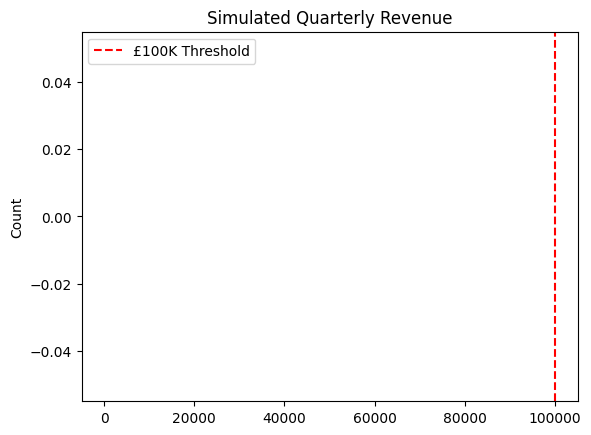

In [10]:
sns.histplot(quarterly_sim, kde=True)
plt.axvline(100000, color='red', linestyle='--', label='£100K Threshold')
plt.title("Simulated Quarterly Revenue")
plt.legend()
plt.show()

# Summary Stats

In [11]:
print(f"Mean: £{quarterly_sim.mean():,.2f}")
print(f"90% CI: £{np.percentile(quarterly_sim, 5):,.2f} - £{np.percentile(quarterly_sim, 95):,.2f}")

Mean: £nan
90% CI: £nan - £nan
